<a href="https://colab.research.google.com/github/somosnlp/llm-arena/blob/main/An%C3%A1lisis_general_arena_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Distribuci√≥n de prompts por pa√≠s, 2.longitud media del prompt, .respuestas chosen y rejected por pa√≠s y 3.similitud y divergengia entre respuestas chosen y rejected

In [ ]:
!pip install spacy
!python -m spacy download es_core_news_sm


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.9/12.9 MB 95.7 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Mounted at /content/drive


/tmp/ipython-input-5-53453874.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="country", order=df["country"].value_counts().index, palette="Set2")


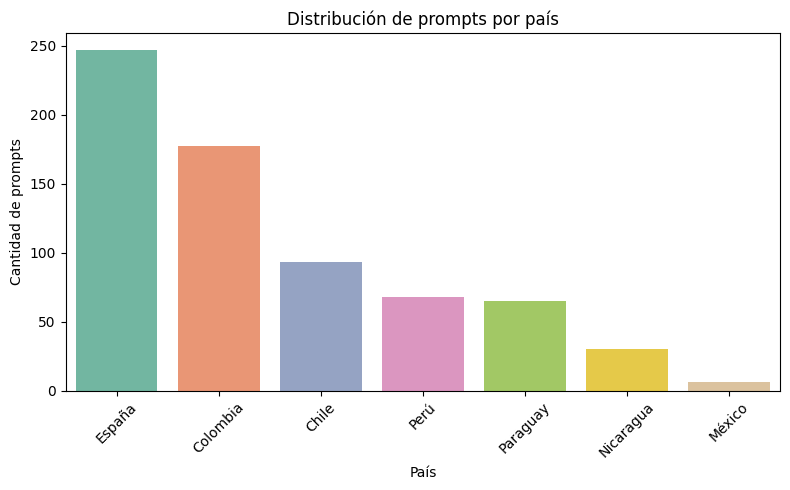

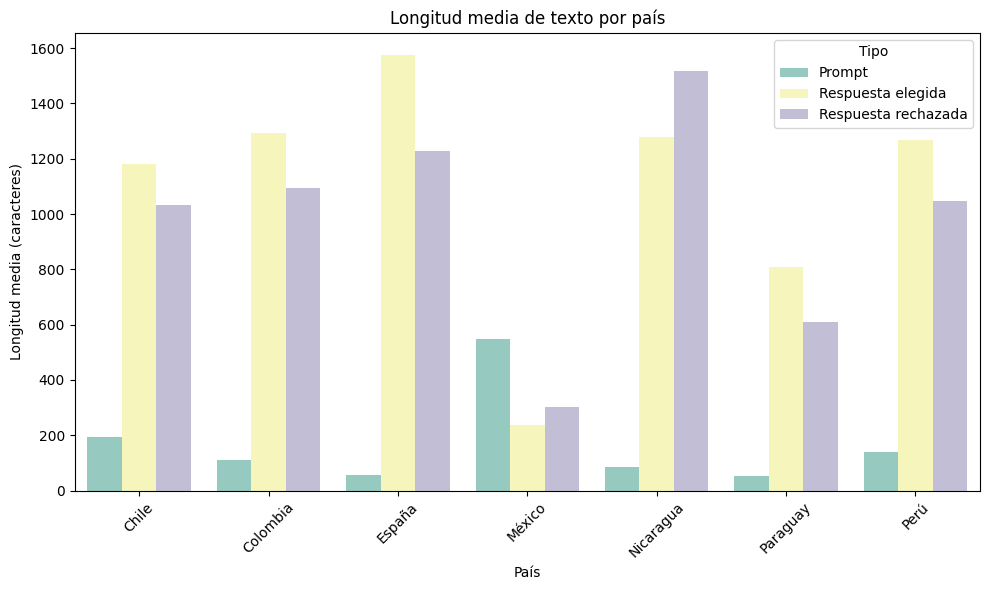

/tmp/ipython-input-5-53453874.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="country", y="similarity", palette="Set1")


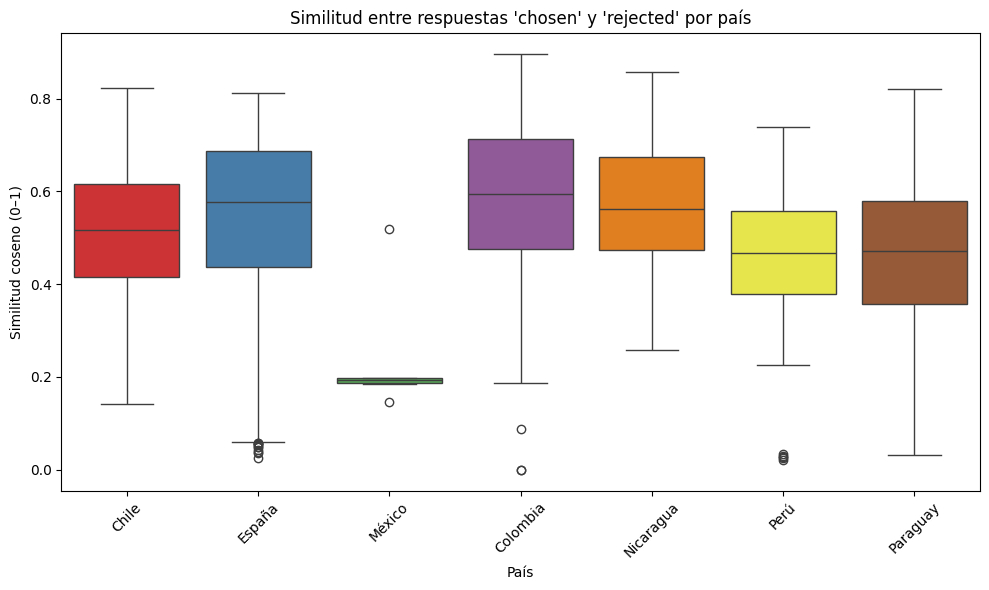


‚úÖ Todos los gr√°ficos han sido guardados en tu Drive: /content/drive/MyDrive/graficos_dpo


In [ ]:
# üì¶ Instalar dependencias si es necesario
!pip install matplotlib seaborn scikit-learn

# üìö Importar librer√≠as
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

# üîó Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# üóÇÔ∏è Ruta donde guardar√°s los gr√°ficos (ajusta si quieres usar otra carpeta)
drive_folder = "/content/drive/MyDrive/graficos_dpo"
os.makedirs(drive_folder, exist_ok=True)

# üìÅ Cargar CSV (ajusta la ruta si lo subes manualmente en Colab)
file_path = "/content/dataset_preferencias_dpo_v0.csv"
df = pd.read_csv(file_path)

# üéØ 1. Distribuci√≥n de prompts por pa√≠s
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="country", order=df["country"].value_counts().index, palette="Set2")
plt.title("Distribuci√≥n de prompts por pa√≠s")
plt.xlabel("Pa√≠s")
plt.ylabel("Cantidad de prompts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{drive_folder}/distribucion_prompts_por_pais.png")
plt.show()

# ‚úçÔ∏è 2. Longitud media de textos por pa√≠s
df["question_len"] = df["question"].str.len()
df["chosen_len"] = df["chosen"].str.len()
df["rejected_len"] = df["rejected"].str.len()

lengths = df.groupby("country")[["question_len", "chosen_len", "rejected_len"]].mean().reset_index()
lengths_melted = lengths.melt(id_vars="country", var_name="Tipo", value_name="Longitud media")
lengths_melted["Tipo"] = lengths_melted["Tipo"].map({
    "question_len": "Prompt",
    "chosen_len": "Respuesta elegida",
    "rejected_len": "Respuesta rechazada"
})

plt.figure(figsize=(10, 6))
sns.barplot(data=lengths_melted, x="country", y="Longitud media", hue="Tipo", palette="Set3")
plt.title("Longitud media de texto por pa√≠s")
plt.xlabel("Pa√≠s")
plt.ylabel("Longitud media (caracteres)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{drive_folder}/longitud_media_por_pais.png")
plt.show()

# üîÅ 3. Similitud entre 'chosen' y 'rejected'
def calcular_similitud(texto1, texto2):
    try:
        tfidf = TfidfVectorizer()
        tfidf_matrix = tfidf.fit_transform([str(texto1), str(texto2)])
        return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    except:
        return None

df["similarity"] = df.apply(lambda row: calcular_similitud(row["chosen"], row["rejected"]), axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="country", y="similarity", palette="Set1")
plt.title("Similitud entre respuestas 'chosen' y 'rejected' por pa√≠s")
plt.xlabel("Pa√≠s")
plt.ylabel("Similitud coseno (0‚Äì1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{drive_folder}/similitud_chosen_rejected_por_pais.png")
plt.show()

print(f"\n‚úÖ Todos los gr√°ficos han sido guardados en tu Drive: {drive_folder}")



In [ ]:
# üîó Montar Google Drive y crear carpeta
from google.colab import drive
import os

drive.mount('/content/drive')

# Carpeta donde se guardar√°n los gr√°ficos
drive_folder = "/content/drive/MyDrive/graficos_dpo"
os.makedirs(drive_folder, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 4. An√°lisis de temas (topic modeling) y clustering por pa√≠s

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = stopwords.words("spanish")

# Agrupar todos los prompts por pa√≠s
texts_by_country = df.groupby("country")["question"].apply(lambda x: " ".join(x)).to_dict()

# NMF por pa√≠s
n_topics = 5
for country, text in texts_by_country.items():
    tfidf = TfidfVectorizer(stop_words=stop_words, max_features=1000)
    tfidf_matrix = tfidf.fit_transform([text])

    if tfidf_matrix.shape[1] < n_topics:
        print(f"‚ö†Ô∏è No hay suficientes t√©rminos √∫nicos para generar {n_topics} t√≥picos en {country}.")
        continue

    nmf = NMF(n_components=n_topics, random_state=42)
    W = nmf.fit_transform(tfidf_matrix)
    H = nmf.components_
    vocab = tfidf.get_feature_names_out()

    # Visualizaci√≥n
    fig, axes = plt.subplots(1, n_topics, figsize=(16, 4))
    for i, topic in enumerate(H):
        top_words = [vocab[j] for j in topic.argsort()[-7:][::-1]]
        axes[i].barh(top_words[::-1], topic[topic.argsort()[-7:]])
        axes[i].set_title(f"T√≥pico {i+1}")
    fig.suptitle(f"T√≥picos m√°s frecuentes ‚Äì {country}")
    plt.tight_layout()
    plt.savefig(f"{drive_folder}/topics_{country}.png")
    plt.close()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:133: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:133: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:133: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:133: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset_preferencias_dpo_v0.csv to dataset_preferencias_dpo_v0 (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("dataset_preferencias_dpo_v0.csv")  # Reemplaza con el nombre exacto si es otro
df.head()  # Para ver las primeras filas y confirmar que se carg√≥ bien


country                                      system_prompt  \
0   Chile  Una conversaci√≥n entre un usuario y un modelo ...   
1   Chile  Una conversaci√≥n entre un usuario y un modelo ...   
2   Chile  Una conversaci√≥n entre un usuario y un modelo ...   
3   Chile  Una conversaci√≥n entre un usuario y un modelo ...   
4   Chile  Una conversaci√≥n entre un usuario y un modelo ...   

                                            question  \
0  Situaci√≥n:\n\nEres un chileno caminando por Es...   
1                                       hola que tal   
2  Imagina que vas en el Metro de Santiago de Chi...   
3  Eres Venezolano de toda tu vida y vas por prim...   
4  Eres Vi√±a Marino de toda tu vida y est√°s en el...   

                                              chosen  \
0  ¬°Uf, compadre! Caminando por Estaci√≥n Central ...   
1  ¬°Hola! Muy bien, gracias por preguntar. ¬øEn qu...   
2  ¬°Qu√© situaci√≥n m√°s particular! A ver, consider...   
3  El Festival de Vi√±a del Mar es uno de los even...   
4  Como Vi√±amarino de toda la vida y estando en e...   

                                            rejected  
0  En una situaci√≥n as√≠, la sensaci√≥n que podr√≠as...  
1  Hola, estoy bien, gracias. ¬øEn qu√© puedo ayuda...  
2  Basado en lo que se conoce sobre el fen√≥meno d...  
3  Como asistente de lenguaje, no tengo una nacio...  
4  En el Festival de Vi√±a del Mar, la reacci√≥n de...

# 6. Frecuencia de palabras y expresiones locales por pa√≠s

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import string

# Lista de stopwords en espa√±ol
stop_words = set(stopwords.words("spanish"))
punct = set(string.punctuation)

def contar_palabras_basico(textos):
    palabras = []
    for texto in textos:
        tokens = str(texto).lower().split()
        tokens = [t.strip("".join(punct)) for t in tokens if t.isalpha() and t not in stop_words]
        palabras.extend(tokens)
    return Counter(palabras)

# Crear gr√°ficas para cada pa√≠s
for pais in df["country"].unique():
    subset = df[df["country"] == pais]["chosen"]
    freqs = contar_palabras_basico(subset)
    top = freqs.most_common(10)
    if not top:
        continue
    palabras, cuentas = zip(*top)

    plt.figure(figsize=(8,4))
    sns.barplot(x=list(cuentas), y=list(palabras), palette="viridis")
    plt.title(f"Top 10 palabras m√°s frecuentes en {pais}")
    plt.xlabel("Frecuencia")
    plt.tight_layout()
    plt.savefig(f"{drive_folder}/frecuencia_palabras_{pais}.png")
    plt.close()

print("‚úÖ Gr√°ficos de frecuencia de palabras guardados en tu Drive.")


/tmp/ipython-input-9-1581555898.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cuentas), y=list(palabras), palette="viridis")
/tmp/ipython-input-9-1581555898.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cuentas), y=list(palabras), palette="viridis")
/tmp/ipython-input-9-1581555898.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cuentas), y=list(palabras), palette="viridis")
/tmp/ipython-input-9-1581555898.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

‚úÖ Gr√°ficos de frecuencia de palabras guardados en tu Drive.


# 7. An√°lisis de estilo narrativo, modismos, y formalidad entre chosen y rejected

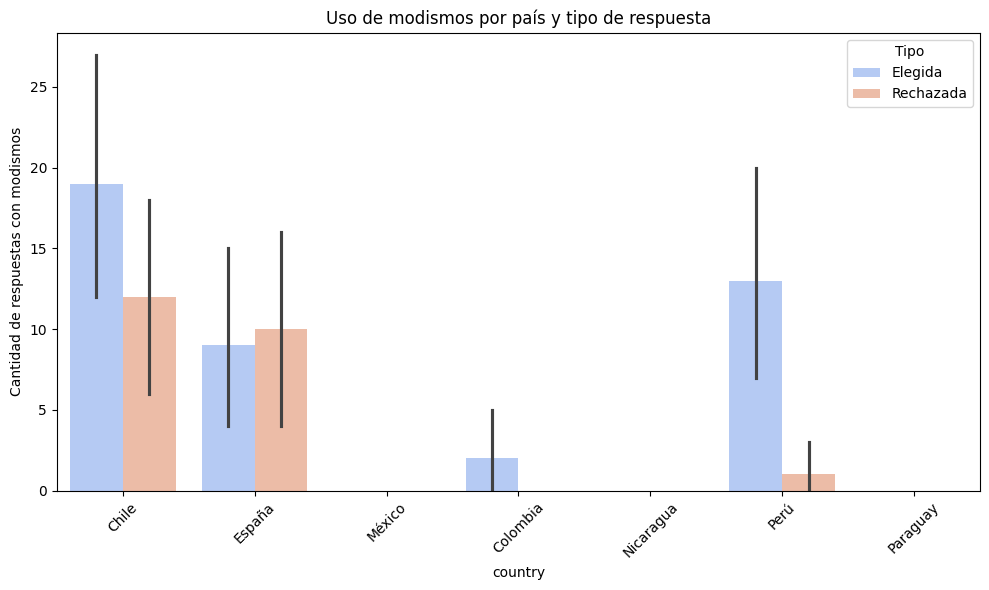

In [ ]:
import spacy
nlp = spacy.load("es_core_news_sm")

def extraer_estilo(texto):
    doc = nlp(str(texto))
    tokens = [token.text.lower() for token in doc]
    tiene_modismo = any(w in tokens for w in ["we√≥n", "cachai", "ch√©vere", "t√≠o", "pata", "guay"])
    segunda_persona = "t√∫" in tokens or "usted" in tokens
    primera_persona = any(tok.text.lower() in ["yo", "nosotros"] for tok in doc if tok.pos_ == "PRON")
    imperativos = sum(1 for tok in doc if tok.pos_ == "VERB" and "Imp" in tok.morph.get("Mood"))
    return pd.Series({
        "modismo": tiene_modismo,
        "segunda_persona": segunda_persona,
        "primera_persona": primera_persona,
        "imperativos": imperativos
    })

df_chosen = df["chosen"].apply(extraer_estilo).add_prefix("chosen_")
df_rejected = df["rejected"].apply(extraer_estilo).add_prefix("rejected_")
df_estilo = pd.concat([df["country"], df_chosen, df_rejected], axis=1)

# Gr√°fico: uso de modismos en chosen vs rejected
df_plot = df_estilo[["country", "chosen_modismo", "rejected_modismo"]].melt(
    id_vars="country", var_name="Tipo", value_name="Uso")
df_plot["Tipo"] = df_plot["Tipo"].map({
    "chosen_modismo": "Elegida",
    "rejected_modismo": "Rechazada"
})

plt.figure(figsize=(10,6))
sns.barplot(data=df_plot, x="country", y="Uso", hue="Tipo", palette="coolwarm", estimator=sum)
plt.title("Uso de modismos por pa√≠s y tipo de respuesta")
plt.ylabel("Cantidad de respuestas con modismos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{drive_folder}/modismos_por_pais.png")
plt.show()



# 8. Clasificaci√≥n de prompts (clustering, clasificaci√≥n no supervisada)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


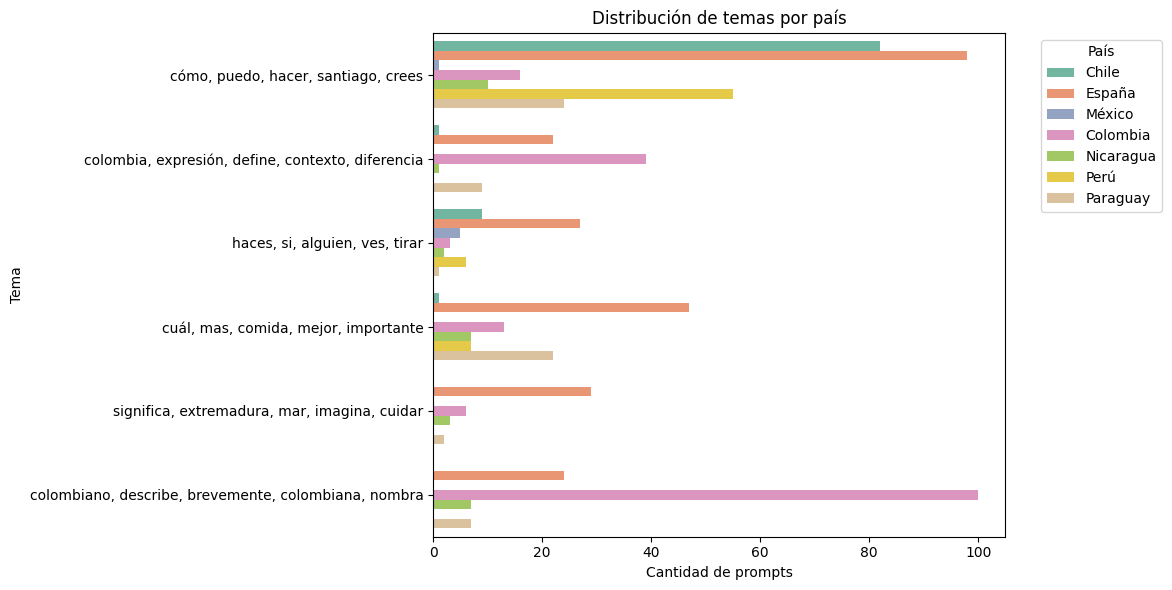

‚úÖ CSV con temas guardado en: /content/drive/MyDrive/graficos_dpo/dataset_con_temas.csv


In [ ]:
# üì¶ Instalar dependencias necesarias
!pip install -q pandas scikit-learn matplotlib seaborn nltk

# üìö Importar librer√≠as
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# üõë Stopwords en espa√±ol
spanish_stopwords = stopwords.words("spanish")

# üìÅ Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# üìÇ Carpeta para guardar
output_folder = "/content/drive/MyDrive/graficos_dpo"
os.makedirs(output_folder, exist_ok=True)

# üì• Cargar CSV
file_path = "/content/dataset_preferencias_dpo_v0.csv"
df = pd.read_csv(file_path)
df.dropna(subset=["question"], inplace=True)

# üß† TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=spanish_stopwords, max_features=1000)
tfidf = vectorizer.fit_transform(df["question"])

# üß™ Topic modeling con NMF
n_topics = 6
nmf = NMF(n_components=n_topics, random_state=42)
W = nmf.fit_transform(tfidf)
H = nmf.components_

# üè∑Ô∏è Etiquetas
df["topic_id"] = W.argmax(axis=1)
feature_names = vectorizer.get_feature_names_out()
topic_keywords = [", ".join([feature_names[i] for i in topic.argsort()[-5:][::-1]]) for topic in H]
df["topic_label"] = df["topic_id"].apply(lambda i: topic_keywords[i])

# üìä Gr√°fico de temas por pa√≠s
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="topic_label", hue="country", palette="Set2")
plt.title("Distribuci√≥n de temas por pa√≠s")
plt.xlabel("Cantidad de prompts")
plt.ylabel("Tema")
plt.legend(title="Pa√≠s", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f"{output_folder}/temas_por_pais.png")
plt.show()

# üíæ Guardar CSV con temas asignados
df.to_csv(f"{output_folder}/dataset_con_temas.csv", index=False)
print("‚úÖ CSV con temas guardado en:", f"{output_folder}/dataset_con_temas.csv")



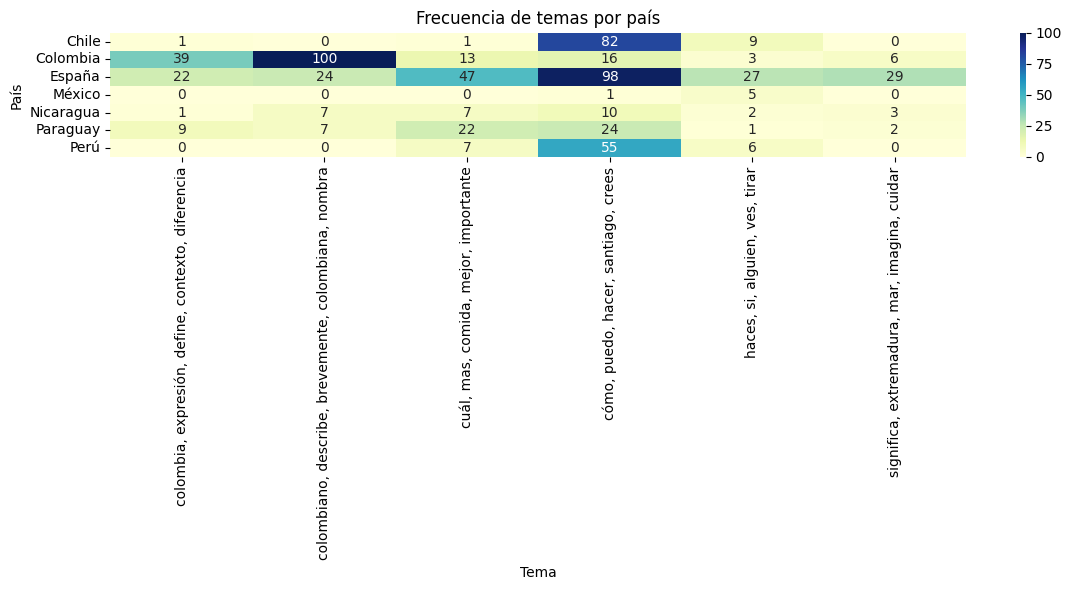

‚úÖ Heatmap guardado en: /content/drive/MyDrive/graficos_dpo/heatmap_temas_por_pais.png


In [ ]:
# üìã Tabla resumen: cantidad de prompts por pa√≠s y tema
tabla_resumen = df.groupby(["country", "topic_label"]).size().unstack(fill_value=0)

# üî• Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_resumen, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Frecuencia de temas por pa√≠s")
plt.xlabel("Tema")
plt.ylabel("Pa√≠s")
plt.tight_layout()

# üíæ Guardar en Drive
heatmap_path = f"{output_folder}/heatmap_temas_por_pais.png"
plt.savefig(heatmap_path)
plt.show()

print("‚úÖ Heatmap guardado en:", heatmap_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = "/content/dataset_preferencias_dpo_v0.csv"  # Ajusta la ruta si est√°s usando Drive

try:
    df = pd.read_csv(file_path, sep=",", encoding="utf-8")
except pd.errors.ParserError:
    df = pd.read_csv(file_path, sep=";", encoding="utf-8")
except Exception as e:
    print(f"Otro error al leer CSV: {e}")

# Elimina filas incompletas
df.dropna(subset=["question", "chosen", "rejected"], inplace=True)


In [ ]:
df.head()
df.columns


Index(['country', 'system_prompt', 'question', 'chosen', 'rejected'], dtype='object')

# Clasificaci√≥n de prompts semisupervisada usando transformers

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


üîé Clasificando prompts...


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


üîé Clasificando respuestas CHOSEN...
üîé Clasificando respuestas REJECTED...


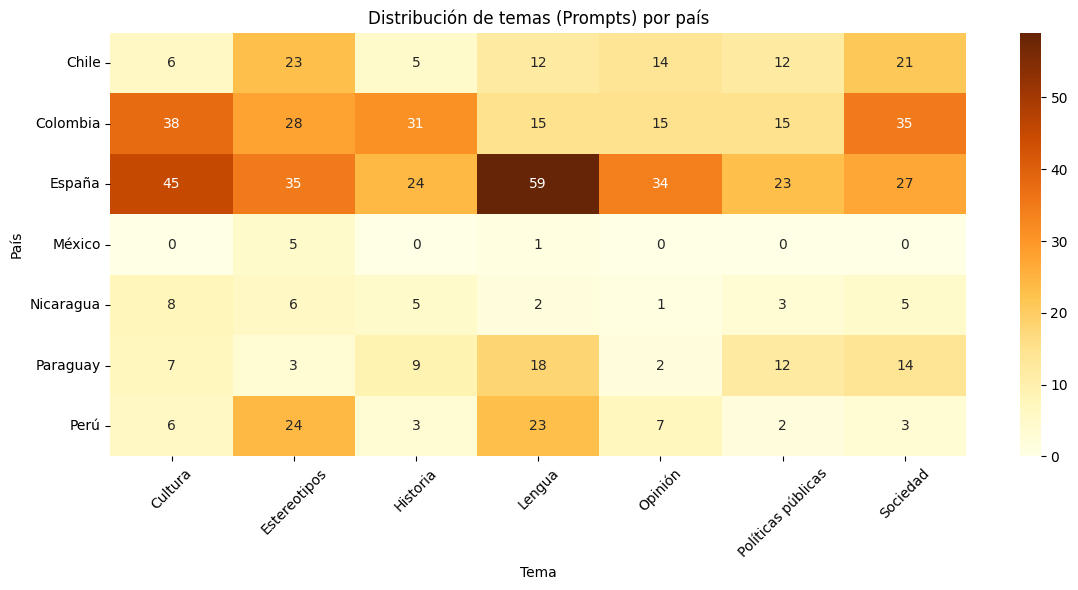

‚úÖ Heatmap de Prompts guardado en: /content/drive/MyDrive/graficos_dpo/heatmap_temas_prompts.png


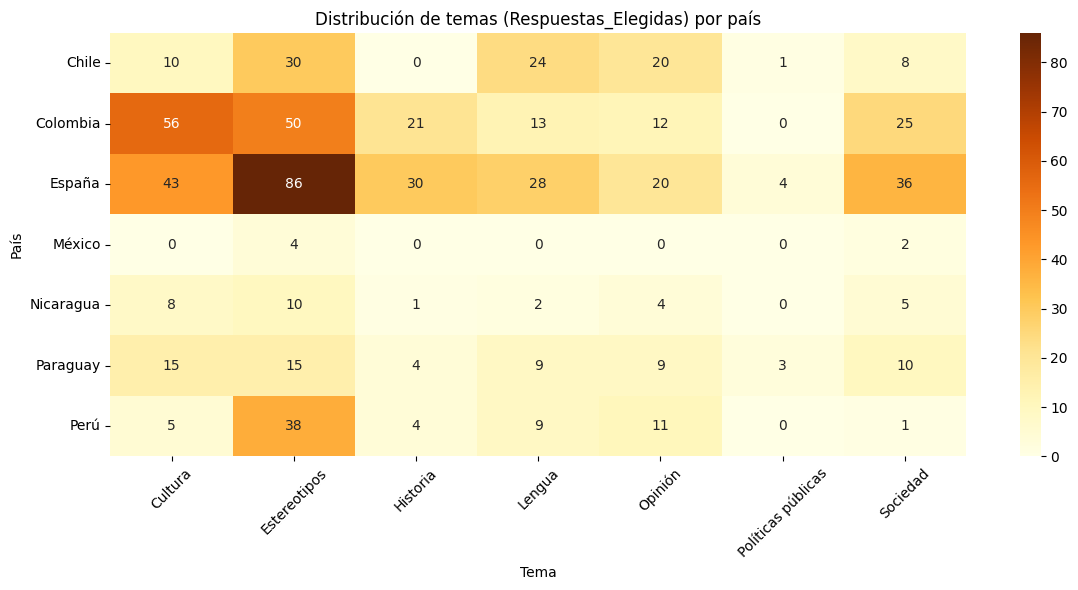

‚úÖ Heatmap de Respuestas_Elegidas guardado en: /content/drive/MyDrive/graficos_dpo/heatmap_temas_respuestas_elegidas.png


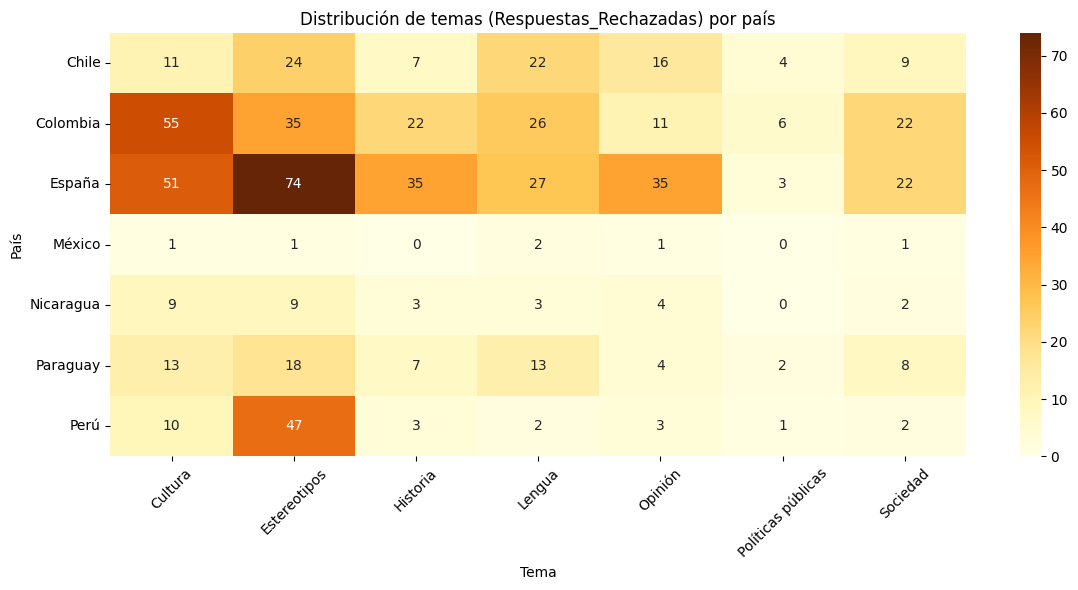

‚úÖ Heatmap de Respuestas_Rechazadas guardado en: /content/drive/MyDrive/graficos_dpo/heatmap_temas_respuestas_rechazadas.png
‚úÖ Todo el an√°lisis y las visualizaciones han sido guardados en Drive: /content/drive/MyDrive/graficos_dpo


In [ ]:
# üì¶ Instalar dependencias necesarias
!pip install -q transformers datasets torch

# üìö Importar librer√≠as
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# üìÅ Montar Drive
from google.colab import drive
drive.mount('/content/drive')

# üìÇ Carpeta de salida en Drive
output_folder = "/content/drive/MyDrive/graficos_dpo"
os.makedirs(output_folder, exist_ok=True)

# üì• Cargar dataset
file_path = "/content/dataset_preferencias_dpo_v0.csv"
df = pd.read_csv(file_path)
df.dropna(subset=["question", "chosen", "rejected"], inplace=True)

# üè∑Ô∏è Definir categor√≠as tem√°ticas
etiquetas = ["Cultura", "Sociedad", "Lengua", "Historia", "Estereotipos", "Opini√≥n", "Pol√≠ticas p√∫blicas"]

# üß† Cargar clasificador multiling√ºe
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# üß™ Funci√≥n de clasificaci√≥n
def clasificar_texto(texto):
    try:
        resultado = classifier(texto, etiquetas)
        return resultado["labels"][0]
    except:
        return "Otro"

# üîç Clasificar cada texto
print("üîé Clasificando prompts...")
df["tema_prompt"] = df["question"].apply(clasificar_texto)

print("üîé Clasificando respuestas CHOSEN...")
df["tema_chosen"] = df["chosen"].apply(clasificar_texto)

print("üîé Clasificando respuestas REJECTED...")
df["tema_rejected"] = df["rejected"].apply(clasificar_texto)

# üíæ Guardar CSV con las etiquetas
etiquetado_csv = f"{output_folder}/dataset_clasificado_temas.csv"
df.to_csv(etiquetado_csv, index=False)

# üìä Crear funci√≥n para visualizaci√≥n por tipo
def graficar_heatmap(df, columna_tema, nombre, carpeta):
    resumen = df.groupby(["country", columna_tema]).size().unstack(fill_value=0)
    plt.figure(figsize=(12, 6))
    sns.heatmap(resumen, annot=True, fmt="d", cmap="YlOrBr", cbar=True)
    plt.title(f"Distribuci√≥n de temas ({nombre}) por pa√≠s")
    plt.xlabel("Tema")
    plt.ylabel("Pa√≠s")
    plt.xticks(rotation=45)
    plt.tight_layout()
    output_path = f"{carpeta}/heatmap_temas_{nombre.lower()}.png"
    plt.savefig(output_path)
    plt.show()
    print(f"‚úÖ Heatmap de {nombre} guardado en:", output_path)

# üìä Generar y guardar heatmaps
graficar_heatmap(df, "tema_prompt", "Prompts", output_folder)
graficar_heatmap(df, "tema_chosen", "Respuestas_Elegidas", output_folder)
graficar_heatmap(df, "tema_rejected", "Respuestas_Rechazadas", output_folder)

print("‚úÖ Todo el an√°lisis y las visualizaciones han sido guardados en Drive:", output_folder)


# Tem√°ticas con mayor respuestas aceptadas (chosen)

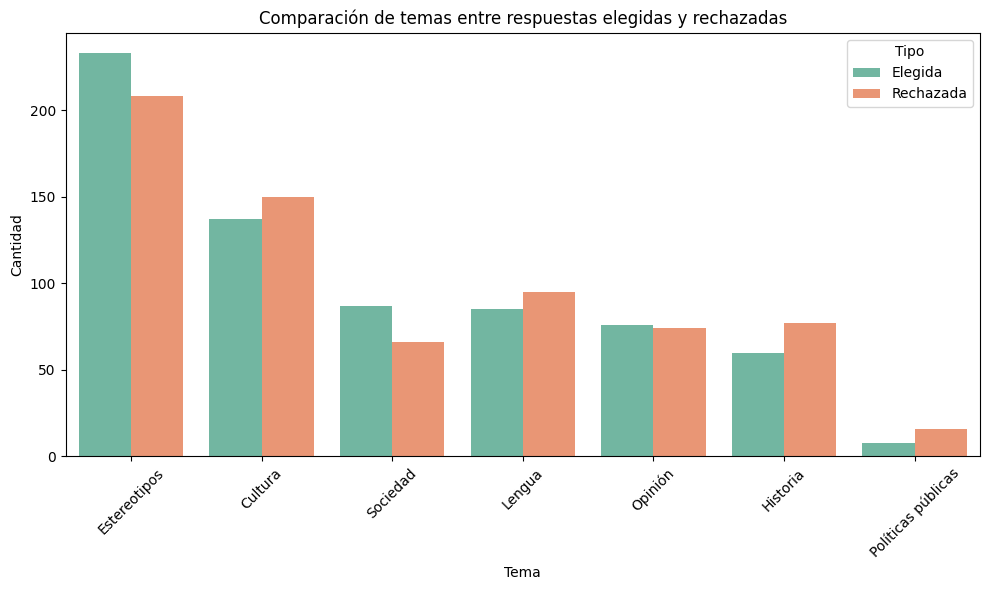

‚úÖ Gr√°fico global guardado en Drive.
‚úÖ Guardado gr√°fico para Chile: /content/drive/MyDrive/graficos_dpo/comparacion_temas_chile.png
‚úÖ Guardado gr√°fico para Espa√±a: /content/drive/MyDrive/graficos_dpo/comparacion_temas_espa√±a.png
‚úÖ Guardado gr√°fico para M√©xico: /content/drive/MyDrive/graficos_dpo/comparacion_temas_m√©xico.png
‚úÖ Guardado gr√°fico para Colombia: /content/drive/MyDrive/graficos_dpo/comparacion_temas_colombia.png
‚úÖ Guardado gr√°fico para Nicaragua: /content/drive/MyDrive/graficos_dpo/comparacion_temas_nicaragua.png
‚úÖ Guardado gr√°fico para Per√∫: /content/drive/MyDrive/graficos_dpo/comparacion_temas_per√∫.png
‚úÖ Guardado gr√°fico para Paraguay: /content/drive/MyDrive/graficos_dpo/comparacion_temas_paraguay.png


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# üìÇ Carpeta donde se guardar√°n las gr√°ficas
output_folder = "/content/drive/MyDrive/graficos_dpo"

# üîÑ Crear tabla resumen de temas por tipo de respuesta
def preparar_tabla_comparativa(df, columna, tipo):
    conteo = df[columna].value_counts().reset_index()
    conteo.columns = ["Tema", "Cantidad"]
    conteo["Tipo"] = tipo
    return conteo

# üìä Resumen global
tabla_chosen = preparar_tabla_comparativa(df, "tema_chosen", "Elegida")
tabla_rejected = preparar_tabla_comparativa(df, "tema_rejected", "Rechazada")
tabla_comparativa = pd.concat([tabla_chosen, tabla_rejected])

# üìà Visualizaci√≥n general
plt.figure(figsize=(10, 6))
sns.barplot(data=tabla_comparativa, x="Tema", y="Cantidad", hue="Tipo", palette="Set2")
plt.title("Comparaci√≥n de temas entre respuestas elegidas y rechazadas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_folder}/comparacion_temas_chosen_rejected_global.png")
plt.show()

print("‚úÖ Gr√°fico global guardado en Drive.")

# üìä Comparaci√≥n por pa√≠s (opcional: m√°s detallado)
def comparar_por_pais(df, output_folder):
    paises = df["country"].unique()
    for pais in paises:
        subset = df[df["country"] == pais]
        chosen = preparar_tabla_comparativa(subset, "tema_chosen", "Elegida")
        rejected = preparar_tabla_comparativa(subset, "tema_rejected", "Rechazada")
        comp = pd.concat([chosen, rejected])

        plt.figure(figsize=(10, 5))
        sns.barplot(data=comp, x="Tema", y="Cantidad", hue="Tipo", palette="Set3")
        plt.title(f"Comparaci√≥n de temas por tipo de respuesta ‚Äì {pais}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        nombre_archivo = f"{output_folder}/comparacion_temas_{pais.lower()}.png"
        plt.savefig(nombre_archivo)
        plt.close()
        print(f"‚úÖ Guardado gr√°fico para {pais}: {nombre_archivo}")

# Ejecutar comparaci√≥n por pa√≠s
comparar_por_pais(df, output_folder)


# Tabla con los temas m√°s recurrentes por pa√≠s

In [ ]:
import pandas as pd
import os

# Ruta de salida en Google Drive
output_path = "/content/drive/MyDrive/graficos_dpo/temas_por_pais.csv"

# Agrupar por pa√≠s y tema del prompt
tabla_temas = (
    df.groupby(['country', 'tema_prompt'])
    .size()
    .reset_index(name='Frecuencia')
    .sort_values(['country', 'Frecuencia'], ascending=[True, False])
)

# Guardar en Drive
tabla_temas.to_csv(output_path, index=False)

print(f"‚úÖ Tabla de temas por pa√≠s guardada en: {output_path}")


‚úÖ Tabla de temas por pa√≠s guardada en: /content/drive/MyDrive/graficos_dpo/temas_por_pais.csv


# Gr√°fico de temas m√°s frecuentes globalmente

/tmp/ipython-input-11-717049587.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-11-717049587.py:31: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-11-717049587.py:34: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


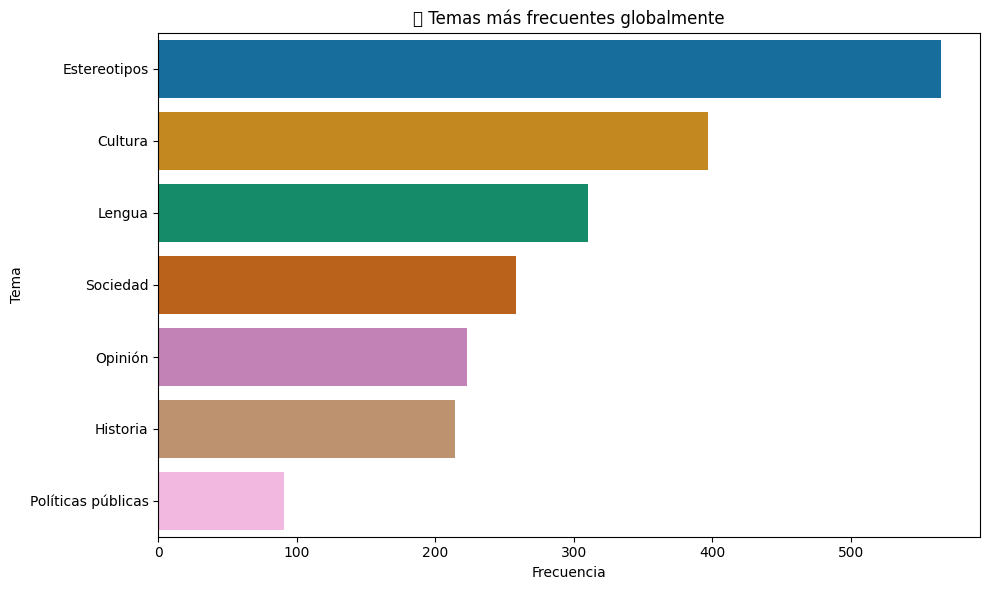

‚úÖ Gr√°fico guardado en: /content/drive/MyDrive/graficos_dpo/temas_frecuencia_global.png


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ruta de guardado en Drive
output_path = "/content/drive/MyDrive/graficos_dpo/temas_frecuencia_global.png"

# üß± Unir todos los temas en una sola serie
temas_combinados = pd.concat([
    df["tema_prompt"],
    df["tema_chosen"],
    df["tema_rejected"]
])

# üßÆ Contar frecuencia total por tema
frecuencias_globales = temas_combinados.value_counts().reset_index()
frecuencias_globales.columns = ["Tema", "Frecuencia"]

# üé® Gr√°fico de barras horizontal con paleta dalt√≥nica
plt.figure(figsize=(10, 6))
sns.barplot(
    data=frecuencias_globales,
    y="Tema",
    x="Frecuencia",
    palette="colorblind"
)
plt.title("üß† Temas m√°s frecuentes globalmente")
plt.xlabel("Frecuencia")
plt.ylabel("Tema")
plt.tight_layout()

# üíæ Guardar gr√°fico
plt.savefig(output_path)
plt.show()

print(f"‚úÖ Gr√°fico guardado en: {output_path}")
